In [30]:
from classifiers import NaiveBayes, LDA, QDA
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [31]:
models = [NaiveBayes(), LDA(), QDA()]

test_sizes = [0.05, 0.1, 0.2, 0.3, 0.4]

In [32]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [33]:
breast_df = pd.read_csv('./data/breast_cancer.csv')
climate_df = pd.read_csv('./data/climate.csv')
occupancy_df = pd.read_csv('./data/occupancy_detection.csv')

datasets = [breast_df, climate_df, occupancy_df]
datasets_names = [ "Breast Cancer", "Climate", "Occupancy"]

In [35]:
def convert_data(df):
    y = df['label'].values
    X = df.loc[:, df.columns != 'label'].values
    
    return X, y

## Single experiment

In [42]:
for data, name in zip(datasets, datasets_names):
    print(f"Dataset: {name}")
    X, y = convert_data(data)
        
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy(y_test, y_pred)
        
        print(f'\tModel {model.name} accuracy: {round(acc*100)}%')

Dataset: Breast Cancer
	Model Naive Bayes accuracy: 98%
	Model LDA accuracy: 98%
	Model QDA accuracy: 98%
Dataset: Climate
	Model Naive Bayes accuracy: 94%
	Model LDA accuracy: 55%
	Model QDA accuracy: 86%
Dataset: Occupancy
	Model Naive Bayes accuracy: 98%
	Model LDA accuracy: 95%
	Model QDA accuracy: 99%


## Expriment on multiple train test splits

In [36]:
res = []

for data, name in zip(datasets, datasets_names):

    for test_size in test_sizes:
        X, y = convert_data(data)
            
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=123
        )

        
        for model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy(y_test, y_pred)
            
            
            
            res.append([model.name, acc, name])

In [37]:
import seaborn as sns

columns = ['model', 'acc', 'data']
df = pd.DataFrame(res, columns=columns)

breast_res = df[df['data'] == "Breast Cancer"]
climate_res = df[df['data'] == "Climate"]
occupancy_res = df[df['data'] == "Occupancy"]

Text(0.5, 1.0, 'Breast Cancer')

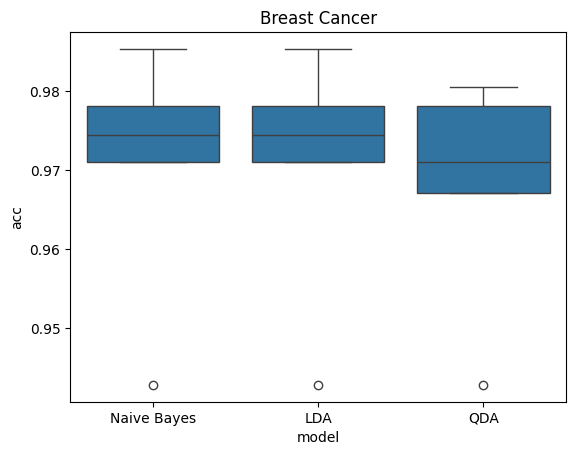

In [38]:
sns.boxplot(x="model", y="acc", data=breast_res).set_title("Breast Cancer")


Text(0.5, 1.0, 'Climate')

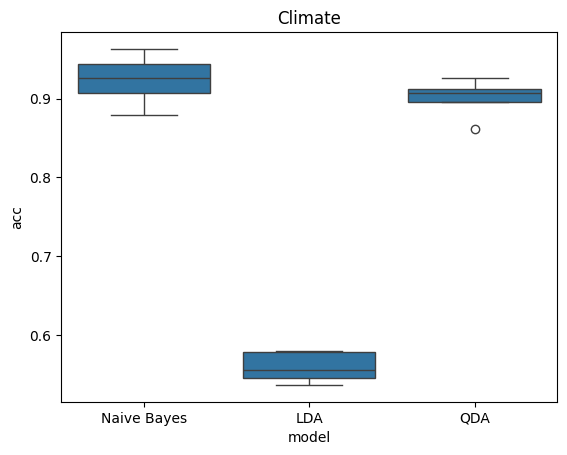

In [39]:
sns.boxplot(x="model", y="acc", data=climate_res).set_title("Climate")

Text(0.5, 1.0, 'Occupancy')

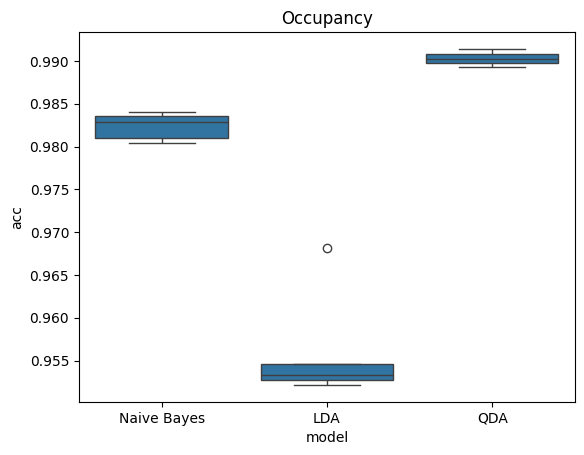

In [40]:
sns.boxplot(x="model", y="acc", data=occupancy_res).set_title("Occupancy")